<a href="https://colab.research.google.com/github/akkinapellisaicharan14/loanprediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Yes
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Yes
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Yes
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Yes
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Yes


In [ ]:
df['Loan_Status'] = df.Loan_Status.map({'Yes': 1, 'No': 0}).astype(int)

In [ ]:
df= df.replace({"Gender":{"Male":1, "Female":0 }})

#Married Encoding
df =df.replace({"Married" :{"Yes":1, "No":0}})

#Replace the 3+ in dependents ande make the column numeric
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents']=pd.to_numeric(df['Dependents'], errors='coerce')

#Count the quantity of values on the column
df['Self_Employed'].value_counts()
df= df.replace({"Self_Employed":{"Yes":1, "No":0 }})

#Education Encoding
df['Education'].value_counts()
df= df.replace({"Education":{"Graduate":1, "Not Graduate":0 }})

#Drop the Loan ID column
df = df.drop(columns=['Loan_ID'])

#Property Area Encoding
df['Property_Area'].value_counts()
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 2})

print(df)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0        1         0.0          1            0.0             5720   
1       1.0        1         1.0          1            0.0             3076   
2       1.0        1         2.0          1            0.0             5000   
3       1.0        1         2.0          1            0.0             2340   
4       1.0        0         0.0          0            0.0             3276   
..      ...      ...         ...        ...            ...              ...   
362     1.0        1         3.0          0            1.0             4009   
363     1.0        1         0.0          1            0.0             4158   
364     1.0        0         0.0          1            0.0             3250   
365     1.0        1         0.0          1            0.0             5000   
366     1.0        0         0.0          1            1.0             9200   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

<ipython-input-22-d68a99d203d6>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


Valores Nulos en <Gender>: <0>
Valores Nulos en <Married>: <0>
Valores Nulos en <Dependents>: <0>
Valores Nulos en <Education>: <0>
Valores Nulos en <Self_Employed>: <0>
Valores Nulos en <ApplicantIncome>: <0>
Valores Nulos en <CoapplicantIncome>: <0>
Valores Nulos en <LoanAmount>: <0>
Valores Nulos en <Loan_Amount_Term>: <0>
Valores Nulos en <Credit_History>: <0>
Valores Nulos en <Property_Area>: <0>
Valores Nulos en <Loan_Status>: <367>


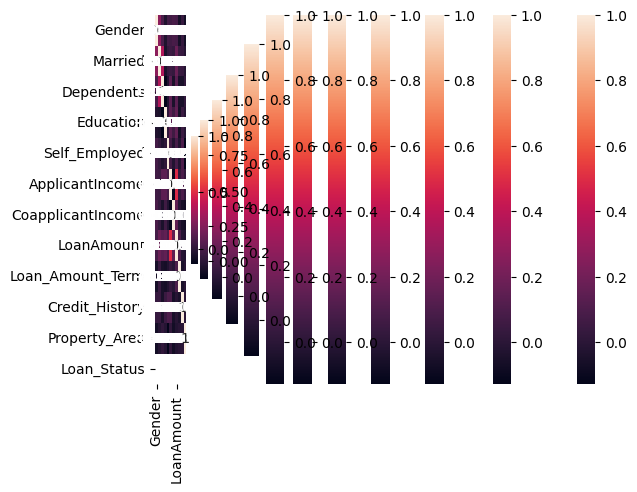

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0        1         0.0          1            0.0             5720   
1       1.0        1         1.0          1            0.0             3076   
2       1.0        1         2.0          1            0.0             5000   
3       1.0        1         2.0          1            0.0             2340   
4       1.0        0         0.0          0            0.0             3276   
..      ...      ...         ...        ...            ...              ...   
362     1.0        1         3.0          0            1.0             4009   
363     1.0        1         0.0          1            0.0             4158   
364     1.0        0         0.0          1            0.0             3250   
365     1.0        1         0.0          1            0.0             5000   
366     1.0        0         0.0          1            1.0             9200   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [ ]:
df.fillna(df.median(), inplace=True)
columns = df.columns
for column in columns:
  df[column] = pd.to_numeric(df[column], errors='coerce')
  col_names= df.columns.tolist()
for column in col_names:
  print("Valores Nulos en <{0}>: <{1}>".format(column,df[column].isnull().sum()))
  sns.heatmap(df.corr(),annot=True)
plt.show()
def correlationdrop(df, sl):
  columns = df.columns
  for column in columns:
      C=abs(df[column].corr(df['Loan_Status']))
      if C < sl:
        df=df.drop(columns=[column])
  return df

df= correlationdrop(df,0.05)

print(df)

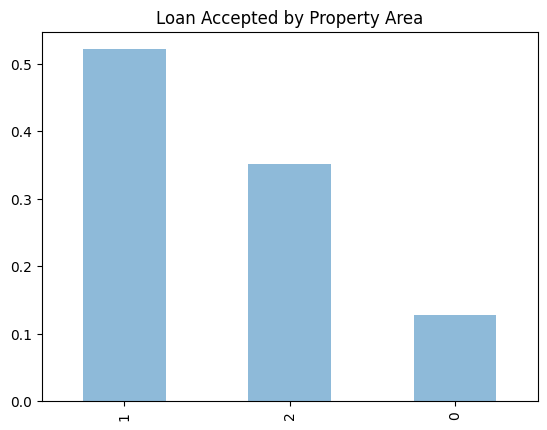

In [ ]:
df.Property_Area[df.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Property Area')
plt.show()


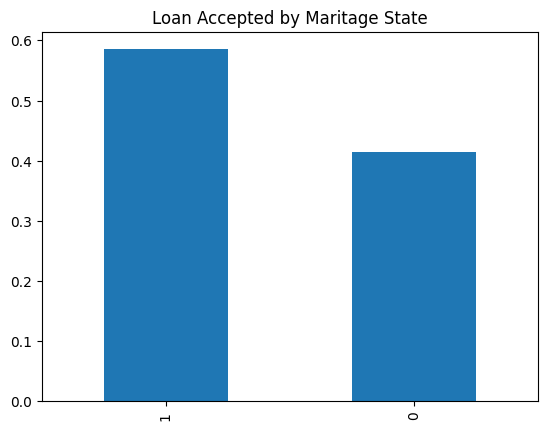

In [ ]:
df.Married[df.Loan_Status==1].value_counts(normalize = True).plot(kind = 'bar')
plt.title('Loan Accepted by Maritage State')
plt.show()

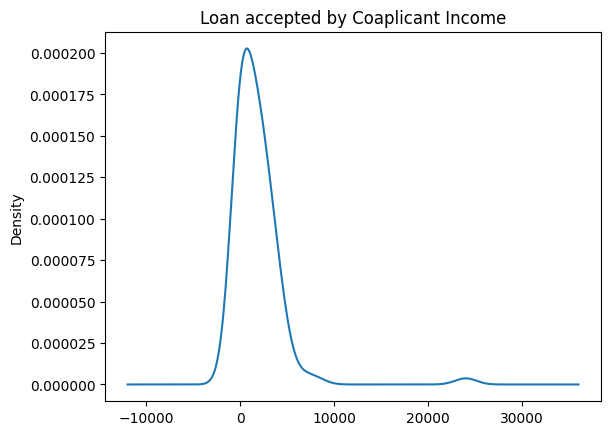

In [ ]:
df.CoapplicantIncome[df.Loan_Status==1].plot(kind='kde')
plt.title('Loan accepted by Coaplicant Income')
plt.show()

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X= sc.fit_transform(x)


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 0)

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma= 0.2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


[[57  0]
 [17  0]]
Accuracy: 73.72 %
Standard Deviation: 1.45 %
